In [1]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [2]:
counts= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/DataFrames/SSConditions_DataFrame.csv')

#Possar com a index la columna entre parentesi:
counts= counts.set_index('ensembl')

#Del dataFrame quedar-nos amb les columnes que comencen per ND i IGT:
counts= counts.filter(regex='^(ND|IGT)')
counts

,IGT_counts,IGT_counts.1,IGT_counts.2,IGT_counts.3,IGT_counts.4,IGT_counts.5,IGT_counts.6,IGT_counts.7,IGT_counts.8,IGT_counts.9,...,ND_counts.8,ND_counts.9,ND_counts.10,ND_counts.11,ND_counts.12,ND_counts.13,ND_counts.14,ND_counts.15,ND_counts.16,ND_counts.17
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,438,118,567,342,183,113,341,377,455,186,...,44,34,28,315,584,704,391,451,622,379
ENSG00000000005.5,0,0,1,7,2,0,0,2,0,0,...,0,0,0,2,0,12,0,0,0,0
ENSG00000000419.12,518,570,892,558,606,686,597,1079,835,565,...,129,165,148,1017,1267,876,900,879,1395,856
ENSG00000000457.13,249,308,285,351,207,314,222,554,320,170,...,70,73,57,433,611,247,427,330,593,228
ENSG00000000460.16,43,32,43,56,56,65,49,80,41,40,...,22,34,5,81,133,59,72,69,83,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285498.1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
ENSG00000285505.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285508.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Del DataFrame filtrar les columnes que tinguin tots els valors 0 (no expressió)
counts= counts[counts.sum(axis=1) > 0]
counts

,IGT_counts,IGT_counts.1,IGT_counts.2,IGT_counts.3,IGT_counts.4,IGT_counts.5,IGT_counts.6,IGT_counts.7,IGT_counts.8,IGT_counts.9,...,ND_counts.8,ND_counts.9,ND_counts.10,ND_counts.11,ND_counts.12,ND_counts.13,ND_counts.14,ND_counts.15,ND_counts.16,ND_counts.17
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,438,118,567,342,183,113,341,377,455,186,...,44,34,28,315,584,704,391,451,622,379
ENSG00000000005.5,0,0,1,7,2,0,0,2,0,0,...,0,0,0,2,0,12,0,0,0,0
ENSG00000000419.12,518,570,892,558,606,686,597,1079,835,565,...,129,165,148,1017,1267,876,900,879,1395,856
ENSG00000000457.13,249,308,285,351,207,314,222,554,320,170,...,70,73,57,433,611,247,427,330,593,228
ENSG00000000460.16,43,32,43,56,56,65,49,80,41,40,...,22,34,5,81,133,59,72,69,83,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483.1,2,0,0,0,0,0,0,2,0,0,...,0,0,0,2,2,0,1,2,0,0
ENSG00000285486.1,0,0,0,0,0,0,0,0,1,25,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285492.1,1,0,4,12,0,0,2,2,0,0,...,1,0,0,3,0,0,3,0,1,0


In [7]:
#Transposar DataFrame:
counts=counts.T
counts

ensembl,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285467.1,ENSG00000285471.1,ENSG00000285473.1,ENSG00000285476.1,ENSG00000285480.1,ENSG00000285483.1,ENSG00000285486.1,ENSG00000285492.1,ENSG00000285498.1,ENSG00000285509.1
IGT_counts,438,0,518,249,43,2,283,426,324,252,...,1,0,0,18,1,2,0,1,0,5
IGT_counts.1,118,0,570,308,32,2,186,426,471,236,...,0,0,0,14,0,0,0,0,0,0
IGT_counts.2,567,1,892,285,43,63,1287,1011,446,237,...,1,0,0,5,0,0,0,4,0,6
IGT_counts.3,342,7,558,351,56,0,130,516,369,250,...,23,0,0,2,0,0,0,12,0,4
IGT_counts.4,183,2,606,207,56,0,57,525,396,251,...,7,0,0,0,0,0,0,0,0,0
IGT_counts.5,113,0,686,314,65,1,14,722,358,327,...,9,0,0,29,0,0,0,0,0,7
IGT_counts.6,341,0,597,222,49,7,140,509,285,185,...,0,0,0,13,0,0,0,2,0,1
IGT_counts.7,377,2,1079,554,80,11,616,668,316,305,...,2,0,0,27,0,2,0,2,0,2
IGT_counts.8,455,0,835,320,41,6,470,672,495,241,...,6,0,0,91,0,0,1,0,0,5
IGT_counts.9,186,0,565,170,40,0,40,441,222,202,...,7,1,0,2,0,0,25,0,0,0


In [8]:
# Dels noms de 'ensmbl' eliminar la extenció decimal:
counts.columns = [col.split('.')[0] for col in counts.columns]
counts

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285467,ENSG00000285471,ENSG00000285473,ENSG00000285476,ENSG00000285480,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
IGT_counts,438,0,518,249,43,2,283,426,324,252,...,1,0,0,18,1,2,0,1,0,5
IGT_counts.1,118,0,570,308,32,2,186,426,471,236,...,0,0,0,14,0,0,0,0,0,0
IGT_counts.2,567,1,892,285,43,63,1287,1011,446,237,...,1,0,0,5,0,0,0,4,0,6
IGT_counts.3,342,7,558,351,56,0,130,516,369,250,...,23,0,0,2,0,0,0,12,0,4
IGT_counts.4,183,2,606,207,56,0,57,525,396,251,...,7,0,0,0,0,0,0,0,0,0
IGT_counts.5,113,0,686,314,65,1,14,722,358,327,...,9,0,0,29,0,0,0,0,0,7
IGT_counts.6,341,0,597,222,49,7,140,509,285,185,...,0,0,0,13,0,0,0,2,0,1
IGT_counts.7,377,2,1079,554,80,11,616,668,316,305,...,2,0,0,27,0,2,0,2,0,2
IGT_counts.8,455,0,835,320,41,6,470,672,495,241,...,6,0,0,91,0,0,1,0,0,5
IGT_counts.9,186,0,565,170,40,0,40,441,222,202,...,7,1,0,2,0,0,25,0,0,0


In [13]:
#Definir les condicions, marcant el numero de files a les que correspon:
conditions = ['IGT'] * 41 + ['ND'] * 18 

# Crear un dataframe composat per el nom de les mostres i a quina condició patològica té:
metadata = pd.DataFrame(zip(counts.index, conditions), columns=['Sample', 'condition'])

#En el dataframe metadata establir la columna sample com index:
metadata=metadata.set_index('Sample')
metadata

,condition
Sample,
IGT_counts,IGT
IGT_counts.1,IGT
IGT_counts.2,IGT
IGT_counts.3,IGT
IGT_counts.4,IGT
IGT_counts.5,IGT
IGT_counts.6,IGT
IGT_counts.7,IGT
IGT_counts.8,IGT


In [15]:
from pydeseq2.dds import DeseqDataSet

# Creació de dds: objecte amb informació informació necessaria per fer DEG.
dds = DeseqDataSet(counts=counts,metadata=metadata,design_factors="condition")
dds

AnnData object with n_obs × n_vars = 59 × 49239
    obs: 'condition'
    obsm: 'design_matrix'

In [17]:
#Calcularà els valors estadístics (resultats) com: log2FoldChange, Pvalue, Pvalue asj (equival a qvalue)...
dds.deseq2()
dds

Fitting size factors...
... done in 0.18 seconds.

Fitting dispersions...
... done in 9.02 seconds.

Fitting dispersion trend curve...
... done in 1.18 seconds.

Fitting MAP dispersions...
... done in 9.81 seconds.

Fitting LFCs...
... done in 6.57 seconds.

Replacing 1386 outlier genes.

Fitting dispersions...
... done in 0.30 seconds.

Fitting MAP dispersions...
... done in 0.29 seconds.

Fitting LFCs...
... done in 0.25 seconds.



AnnData object with n_obs × n_vars = 59 × 49239
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [25]:
from pydeseq2.default_inference import DefaultInference

#Creació de stat_res: objecte que tindrà només els resultats estadístics: log2foldchange...
inference = DefaultInference(n_cpus=8)
stat_res=DeseqStats(dds, inference=inference, contrast=('condition','IGT','ND'))
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: condition IGT vs ND
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003  375.858358        0.207009  0.191833  1.079108  0.280540   
ENSG00000000005    1.135940        0.609883  1.085685  0.561749  0.574287   
ENSG00000000419  760.691720       -0.018704  0.106511 -0.175606  0.860604   
ENSG00000000457  278.923873       -0.102330  0.088957 -1.150334  0.250006   
ENSG00000000460   59.355734       -0.482489  0.162198 -2.974696  0.002933   
...                     ...             ...       ...       ...       ...   
ENSG00000285483    0.416860       -0.908301  1.201300 -0.756098  0.449590   
ENSG00000285486    0.405219        0.273287  1.231707  0.221876  0.824410   
ENSG00000285492    1.961758       -0.130679  0.776063 -0.168387  0.866279   
ENSG00000285498    0.064140       -0.554218  3.282275 -0.168852  0.865913   
ENSG00000285509    4.401411       -1.140698  0.421924 -2.703561  0.006860   

                 

... done in 2.87 seconds.



In [27]:
#Guardar els valors (resultats) de stat_res com a nom de res:
res =stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487
ENSG00000000005,1.135940,0.609883,1.085685,0.561749,0.574287,NaN
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487
...,...,...,...,...,...,...
ENSG00000285483,0.416860,-0.908301,1.201300,-0.756098,0.449590,NaN
ENSG00000285486,0.405219,0.273287,1.231707,0.221876,0.824410,NaN
ENSG00000285492,1.961758,-0.130679,0.776063,-0.168387,0.866279,NaN
ENSG00000285498,0.064140,-0.554218,3.282275,-0.168852,0.865913,NaN


In [28]:
from sanbomics.tools import id_map

#Transformar els 'ensmbl' a symbol, i afegir columna a res amb el symbol:
mapper = id_map(species='human')
res['Symbol'] = res.index.map(mapper.mapper)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487,TSPAN6
ENSG00000000005,1.135940,0.609883,1.085685,0.561749,0.574287,NaN,TNMD
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310,DPM1
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371,SCYL3
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487,C1orf112
...,...,...,...,...,...,...,...
ENSG00000285483,0.416860,-0.908301,1.201300,-0.756098,0.449590,NaN,AL590381.1
ENSG00000285486,0.405219,0.273287,1.231707,0.221876,0.824410,NaN,AC003043.2
ENSG00000285492,1.961758,-0.130679,0.776063,-0.168387,0.866279,NaN,AL356417.3
ENSG00000285498,0.064140,-0.554218,3.282275,-0.168852,0.865913,NaN,NaN


In [29]:
#Filtrar els gens amb molt poca expressió, 
#per fer-ho ens bassem en Basemean (promitg dels recomptes de lectures normalitzades d'un gen), basemean >=10:

res=res[res.baseMean>= 10]
res


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487,TSPAN6
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310,DPM1
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371,SCYL3
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487,C1orf112
ENSG00000000938,16.763865,0.844285,0.445082,1.896921,0.057838,0.409144,FGR
...,...,...,...,...,...,...,...
ENSG00000285410,175.887251,0.117698,0.106849,1.101532,0.270665,0.724040,GABPB1-IT1
ENSG00000285417,10.839996,0.375319,0.398097,0.942783,0.345792,0.782133,NaN
ENSG00000285437,17.103908,-0.006891,0.286204,-0.024078,0.980790,0.998036,POLR2J3
ENSG00000285458,10.714553,0.234254,0.183663,1.275456,0.202148,0.663497,NaN


In [30]:
#Dels resultats identifiquem filtrant els gens diferencialment expressats:
sigs =res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)] #dades filtrades per significancia
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000009790,21.289783,1.322173,0.364763,3.624745,0.000289,0.037770,TRAF3IP3
ENSG00000010610,142.482445,1.131338,0.308387,3.668567,0.000244,0.035298,CD4
ENSG00000011028,30.651587,1.490892,0.387431,3.848145,0.000119,0.026934,MRC2
ENSG00000019582,2856.189767,1.213476,0.321722,3.771814,0.000162,0.030880,CD74
ENSG00000026025,1368.682474,1.162328,0.324997,3.576421,0.000348,0.041662,VIM
...,...,...,...,...,...,...,...
ENSG00000249751,41.082514,1.317929,0.369817,3.563729,0.000366,0.042144,ECSCR
ENSG00000253755,10.029484,3.918390,1.029818,3.804933,0.000142,0.028480,IGHGP
ENSG00000272501,49.038303,-0.830244,0.208842,-3.975465,0.000070,0.022024,AL662844.4
ENSG00000273314,24.448468,0.777454,0.215554,3.606777,0.000310,0.038299,AC005229.4


### PCA:

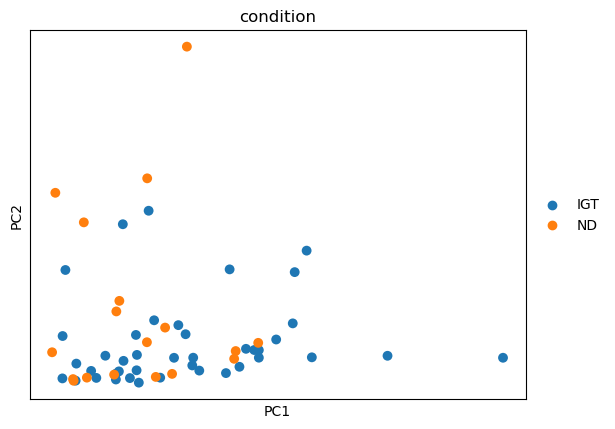

In [34]:
import scanpy as sc

#PCA
sc.tl.pca(dds)
sc.pl.pca(dds, color='condition',size=200)

### GSEA:

In [35]:
import gseapy as gp
from gseapy.plot import gseaplot


In [36]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487,TSPAN6
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310,DPM1
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371,SCYL3
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487,C1orf112
ENSG00000000938,16.763865,0.844285,0.445082,1.896921,0.057838,0.409144,FGR
...,...,...,...,...,...,...,...
ENSG00000285410,175.887251,0.117698,0.106849,1.101532,0.270665,0.724040,GABPB1-IT1
ENSG00000285417,10.839996,0.375319,0.398097,0.942783,0.345792,0.782133,NaN
ENSG00000285437,17.103908,-0.006891,0.286204,-0.024078,0.980790,0.998036,POLR2J3
ENSG00000285458,10.714553,0.234254,0.183663,1.275456,0.202148,0.663497,NaN


In [37]:
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
ENSG00000134817,APLNR,5.406858
ENSG00000148773,MKI67,5.363403
ENSG00000173432,SAA1,5.334161
ENSG00000106483,SFRP4,5.252729
ENSG00000166278,C2,5.200084
...,...,...
ENSG00000167034,NKX3-1,-4.194401
ENSG00000233913,RPL10P9,-4.269628
ENSG00000253729,PRKDC,-4.300023
ENSG00000163125,RPRD2,-4.559838


In [38]:
ranking=ranking.drop_duplicates('Symbol') #elimina els symbols duplicats
ranking

,Symbol,stat
ENSG00000134817,APLNR,5.406858
ENSG00000148773,MKI67,5.363403
ENSG00000173432,SAA1,5.334161
ENSG00000106483,SFRP4,5.252729
ENSG00000166278,C2,5.200084
...,...,...
ENSG00000167034,NKX3-1,-4.194401
ENSG00000233913,RPL10P9,-4.269628
ENSG00000253729,PRKDC,-4.300023
ENSG00000163125,RPRD2,-4.559838


In [39]:
manual_set = {'things':['APLNR','MKI67','SAA1','SFRP4','C2']}
manual_set

{'things': ['APLNR', 'MKI67', 'SAA1', 'SFRP4', 'C2']}

In [40]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [62]:
import gseapy as gp

# Realiza el análisis de enriquecimiento de genes
pre_res = gp.prerank(rnk=ranking.reset_index(drop=True),
                     gene_sets=['Reactome_2022', manual_set],
                     seed=6, permutation_num=100)


In [63]:
out=[]

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])
out_df=pd.DataFrame(out, columns=['Term','fdr','es','nes']).sort_values('fdr').reset_index(drop=True)
out_df

#fdr= p_value corrected
#es=enrichment score
#nes= normalized enrichment score

,Term,fdr,es,nes
0,Reactome_2022__Integrin Cell Surface Interacti...,0.0,0.696111,2.577526
1,Reactome_2022__Collagen Biosynthesis And Modif...,0.0,0.762690,2.779695
2,Reactome_2022__Interferon Alpha/Beta Signaling...,0.0,0.706370,2.541754
3,Reactome_2022__Collagen Chain Trimerization R-...,0.0,0.811034,2.695819
4,Reactome_2022__Immunoregulatory Interactions B...,0.0,0.706258,2.649106
...,...,...,...,...
1064,Reactome_2022__Diseases Of Programmed Cell Dea...,1.0,0.206023,0.720429
1065,Reactome_2022__Canonical Retinoid Cycle In Rod...,1.0,0.246710,0.671008
1066,Reactome_2022__Activation Of APC/C And APC/C:C...,1.0,0.163763,0.604650
1067,Reactome_2022__Viral mRNA Translation R-HSA-19...,1.0,-0.124790,-0.580119


In [65]:
print(out_df.head(20))

                                                 Term       fdr        es  \
0   Reactome_2022__Integrin Cell Surface Interacti...  0.000000  0.696111   
1   Reactome_2022__Collagen Biosynthesis And Modif...  0.000000  0.762690   
2   Reactome_2022__Interferon Alpha/Beta Signaling...  0.000000  0.706370   
3   Reactome_2022__Collagen Chain Trimerization R-...  0.000000  0.811034   
4   Reactome_2022__Immunoregulatory Interactions B...  0.000000  0.706258   
5   Reactome_2022__Cell Surface Interactions At Va...  0.000000  0.615623   
6   Reactome_2022__Assembly Of Collagen Fibrils An...  0.000000  0.756434   
7   Reactome_2022__Degradation Of Extracellular Ma...  0.000000  0.623157   
8   Reactome_2022__Phosphorylation Of CD3 And TCR ...  0.000000  0.869536   
9       Reactome_2022__Signaling By PDGF R-HSA-186797  0.000000  0.692354   
10  Reactome_2022__Interferon Gamma Signaling R-HS...  0.000000  0.652557   
11  Reactome_2022__Extracellular Matrix Organizati...  0.000000  0.669545   

In [66]:
nes=out_df.sort_values('nes')
print(nes.head(20))

                                                  Term       fdr        es  \
12   Reactome_2022__Regulation Of HSF1-mediated Hea...  0.000000 -0.507678   
157  Reactome_2022__Cargo Trafficking To Periciliar...  0.015135 -0.553329   
156  Reactome_2022__NS1 Mediated Effects On Host Pa...  0.015135 -0.542494   
137  Reactome_2022__Calnexin/calreticulin Cycle R-H...  0.011352 -0.658181   
124    Reactome_2022__tRNA Aminoacylation R-HSA-379724  0.009081 -0.555975   
133  Reactome_2022__BBSome-mediated Cargo-Targeting...  0.010090 -0.687550   
121  Reactome_2022__Interactions Of Vpr With Host C...  0.008649 -0.551936   
114  Reactome_2022__ER Quality Control Compartment ...  0.007568 -0.692712   
108  Reactome_2022__Transport Of Ribonucleoproteins...  0.006727 -0.582984   
100  Reactome_2022__rRNA Modification In Nucleus An...  0.006054 -0.525105   
92   Reactome_2022__Transport Of Mature mRNAs Deriv...  0.005504 -0.547159   
83   Reactome_2022__ER To Golgi Anterograde Transpo...  0.005045

### ClusterMap:

In [47]:
import numpy as np
import seaborn as sns

dds.layers['normed_counts']

array([[5.64582749e+02, 0.00000000e+00, 6.67702886e+02, ...,
        1.28900171e+00, 0.00000000e+00, 6.44500855e+00],
       [1.21134259e+02, 0.00000000e+00, 5.85140064e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.78684169e+02, 8.44240156e-01, 7.53062220e+02, ...,
        3.37696063e+00, 0.00000000e+00, 5.06544094e+00],
       ...,
       [4.89142515e+02, 0.00000000e+00, 9.53339847e+02, ...,
        0.00000000e+00, 0.00000000e+00, 4.33829282e+00],
       [3.69205853e+02, 0.00000000e+00, 8.28042066e+02, ...,
        5.93578542e-01, 0.00000000e+00, 7.12294250e+00],
       [3.59397780e+02, 0.00000000e+00, 8.11726911e+02, ...,
        0.00000000e+00, 0.00000000e+00, 2.27586984e+01]])

In [48]:
dds.layers['log1p']=np.log1p(dds.layers['normed_counts'])
dds

AnnData object with n_obs × n_vars = 59 × 49239
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [49]:
dds_sigs=dds[:, sigs.index]
dds_sigs.obs

,condition
Sample,
IGT_counts,IGT
IGT_counts.1,IGT
IGT_counts.2,IGT
IGT_counts.3,IGT
IGT_counts.4,IGT
IGT_counts.5,IGT
IGT_counts.6,IGT
IGT_counts.7,IGT
IGT_counts.8,IGT


In [50]:
grapher=pd.DataFrame(dds_sigs.layers['log1p'].T,
                    index=dds_sigs.var_names, columns=dds_sigs.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher

Sample,IGT_counts,IGT_counts.1,IGT_counts.2,IGT_counts.3,IGT_counts.4,IGT_counts.5,IGT_counts.6,IGT_counts.7,IGT_counts.8,IGT_counts.9,...,ND_counts.8,ND_counts.9,ND_counts.10,ND_counts.11,ND_counts.12,ND_counts.13,ND_counts.14,ND_counts.15,ND_counts.16,ND_counts.17
ENSG00000009790,2.876781,3.160583,4.251743,2.586539,0.000000,0.000000,1.847656,3.143532,3.748373,1.392362,...,2.513882,0.000000,1.777004,3.423592,2.549233,2.694953,2.788237,2.471968,2.094692,2.722885
ENSG00000010610,5.096288,4.938679,5.561380,1.013351,4.171578,2.422597,3.826409,5.193343,5.185435,3.143226,...,2.781118,2.968619,3.696275,4.523507,4.839639,4.920537,4.638688,4.449647,4.691635,5.225286
ENSG00000011028,3.712573,3.069504,4.636214,0.000000,0.000000,0.618563,2.362821,3.177135,3.686729,1.392362,...,1.565332,1.405485,0.000000,2.087723,2.804738,3.420404,3.274143,2.909802,2.934248,3.281044
ENSG00000019582,7.591960,7.573703,8.915366,5.880826,6.451708,5.473042,6.926258,8.187979,8.121043,5.695030,...,5.987325,6.936232,6.266434,6.823991,7.901961,7.674423,7.273271,7.759939,7.434079,7.252118
ENSG00000026025,7.282757,6.348734,8.365555,5.173217,6.258295,4.650213,6.707809,7.136375,7.381893,4.135086,...,5.121028,4.915666,4.999665,6.297114,6.847004,6.983570,7.205514,6.848440,6.949598,6.833481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000249751,3.647564,2.857905,4.961672,0.629892,1.307392,1.487278,0.000000,4.033604,4.217015,2.086517,...,1.565332,0.000000,0.000000,3.067724,3.973239,3.164604,3.559232,3.410602,3.533406,2.994010
ENSG00000253755,0.000000,1.406020,3.726260,0.000000,0.000000,0.000000,1.143577,0.000000,2.676582,0.697196,...,0.000000,1.405485,0.000000,1.137819,0.482987,0.000000,0.545981,0.734564,0.782603,1.346731
ENSG00000272501,3.858708,2.663422,2.835597,3.428549,2.989495,4.490821,3.778708,1.993168,4.083808,3.143226,...,4.636427,4.915666,4.313235,3.685521,4.570786,4.630488,4.279129,3.296938,4.039473,3.754767
ENSG00000273314,3.287657,3.521938,3.056910,3.170215,3.155766,3.251595,3.498614,2.424844,3.665307,0.697196,...,3.659518,1.405485,2.381787,2.963879,3.150714,2.067168,2.273735,3.336279,3.184266,2.840291


C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


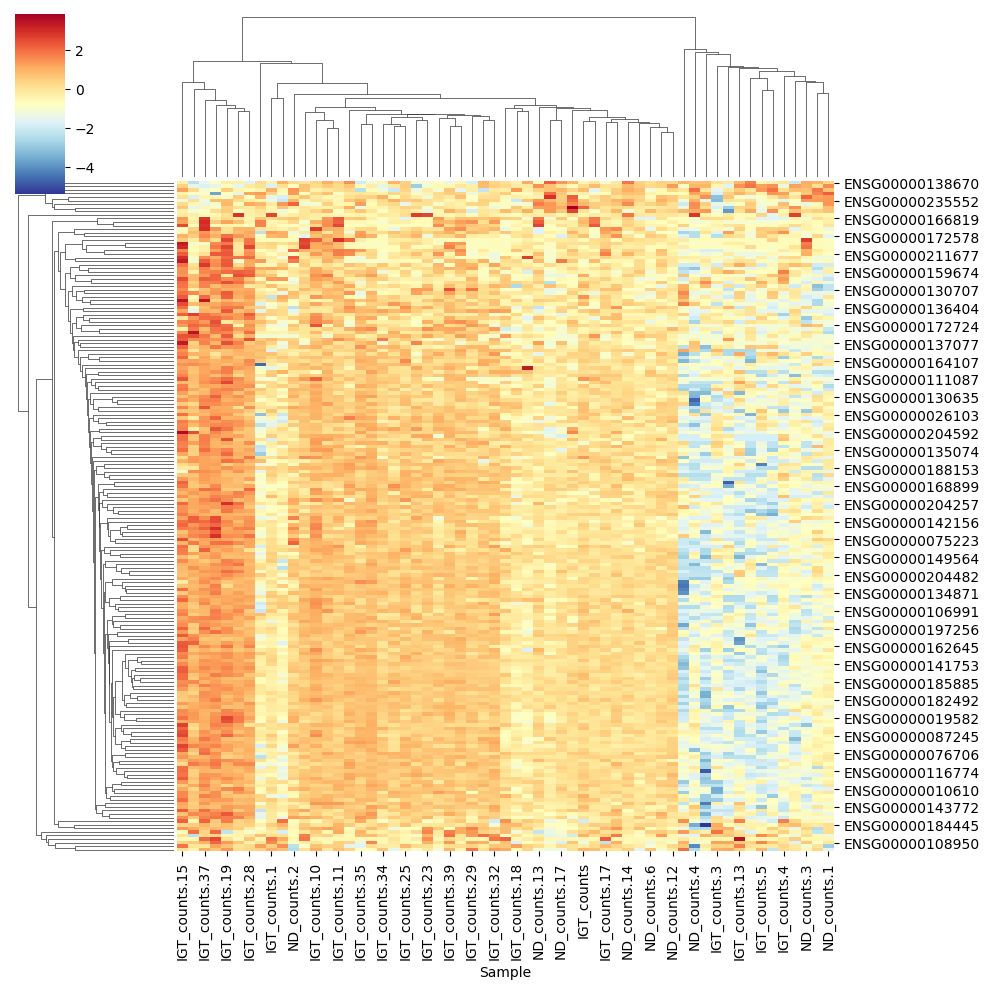

In [51]:
sns.clustermap(grapher, z_score=0, cmap='RdYlBu_r')

<Figure size 1400x1000 with 0 Axes>

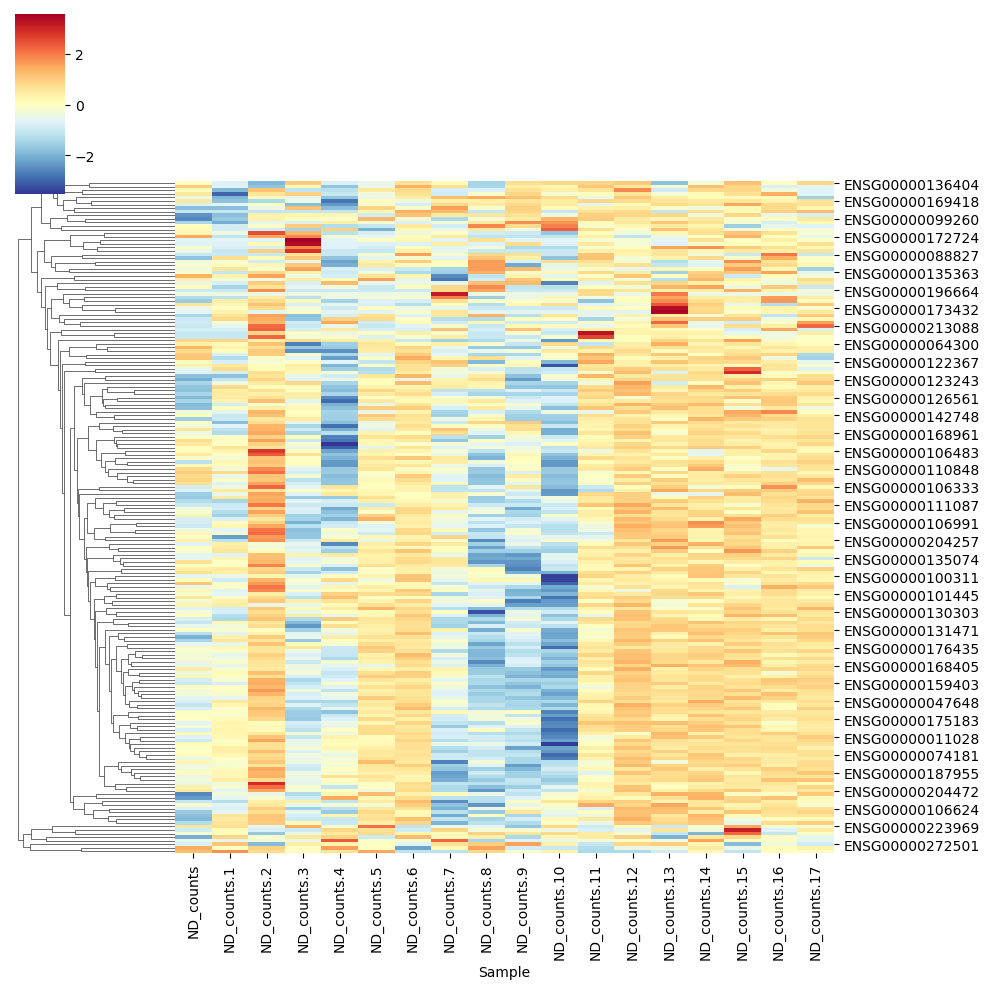

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples = [col for col in grapher.columns if "ND" in col]
t2d_samples = [col for col in grapher.columns if "T2D" in col]

ordered_columns = nd_samples + t2d_samples

grapher_ordered = grapher[ordered_columns]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
sns.clustermap(grapher_ordered, z_score=0, cmap="RdYlBu_r", col_cluster=False)

plt.show()


### VolcanoPlot:

In [53]:
from sanbomics.plots import volcano

res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.858358,0.207009,0.191833,1.079108,0.280540,0.732487,TSPAN6
ENSG00000000419,760.691720,-0.018704,0.106511,-0.175606,0.860604,0.973310,DPM1
ENSG00000000457,278.923873,-0.102330,0.088957,-1.150334,0.250006,0.706371,SCYL3
ENSG00000000460,59.355734,-0.482489,0.162198,-2.974696,0.002933,0.103487,C1orf112
ENSG00000000938,16.763865,0.844285,0.445082,1.896921,0.057838,0.409144,FGR
...,...,...,...,...,...,...,...
ENSG00000285410,175.887251,0.117698,0.106849,1.101532,0.270665,0.724040,GABPB1-IT1
ENSG00000285417,10.839996,0.375319,0.398097,0.942783,0.345792,0.782133,NaN
ENSG00000285437,17.103908,-0.006891,0.286204,-0.024078,0.980790,0.998036,POLR2J3
ENSG00000285458,10.714553,0.234254,0.183663,1.275456,0.202148,0.663497,NaN


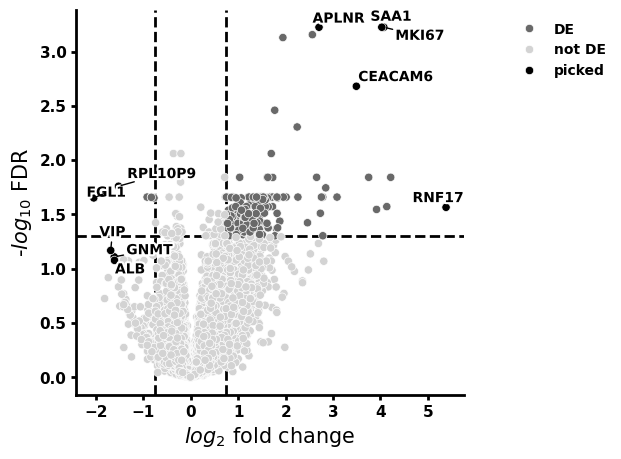

In [54]:
volcano(res, symbol='Symbol')

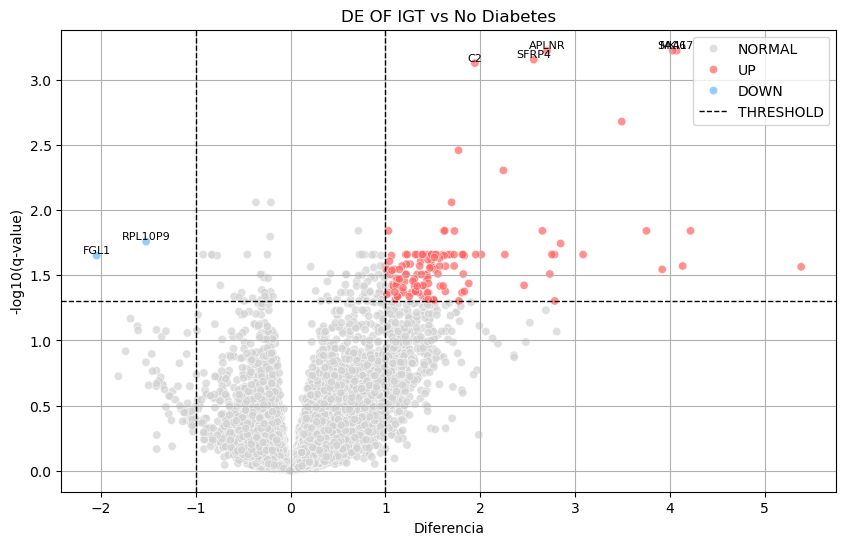

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Datos
t_results = pd.DataFrame({
    'gen': res['Symbol'],
    'p_value': res['pvalue'],
    'q_value': res['padj'],
    'LogFC': res['log2FoldChange']
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['LogFC'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['LogFC'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_sign = t_results[t_results['sign'] != 'NORMAL']

# Crear el Volcano Plot
plt.figure(figsize=(10, 6))
colors = {"NORMAL": "#D2D2D2", "UP": "#FF6462", "DOWN": "#62B8FF"}

sns.scatterplot(x=t_results['LogFC'], y=-np.log10(t_results['q_value']), hue=t_results['sign'], palette=colors, alpha=0.7)
plt.axhline(-np.log10(0.05), color='k', linestyle='--', linewidth=1, label='THRESHOLD')
plt.axvline(1, color='k', linestyle='--', linewidth=1)
plt.axvline(-1, color='k', linestyle='--', linewidth=1)

# Etiquetas y título
plt.xlabel('Diferencia')
plt.ylabel('-log10(q-value)')
plt.title('DE OF IGT vs No Diabetes')
plt.legend()
plt.grid(True)

# Filtrar los genes UP más significativos
up_genes = t_results[t_results['sign'] == 'UP'].nsmallest(5, 'q_value')

for idx, row in up_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

# Filtrar los genes DOWN más significativos
down_genes = t_results[t_results['sign'] == 'DOWN'].nsmallest(5, 'q_value')

for idx, row in down_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

plt.show()
